In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./crime_std.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,0.746988,0.654110,0.440678,0.359173
1,1,0.554217,0.746575,0.271186,0.961240
2,2,0.439759,0.852740,0.813559,0.612403
3,3,0.481928,0.496575,0.305085,0.315245
4,4,0.493976,0.791096,1.000000,0.860465
5,5,0.427711,0.544521,0.779661,0.811370
6,6,0.150602,0.222603,0.762712,0.098191
7,7,0.307229,0.660959,0.677966,0.219638
8,8,0.879518,0.993151,0.813559,0.635659
9,9,1.000000,0.568493,0.474576,0.478036


In [18]:
df.drop(['Unnamed: 0', 'Assault', 'Rape'], axis=1, inplace=True)
df

,Murder,UrbanPop
0,0.746988,0.440678
1,0.554217,0.271186
2,0.439759,0.813559
3,0.481928,0.305085
4,0.493976,1.000000
5,0.427711,0.779661
6,0.150602,0.762712
7,0.307229,0.677966
8,0.879518,0.813559
9,1.000000,0.474576


Text(0.5, 1.0, 'Murder rate')

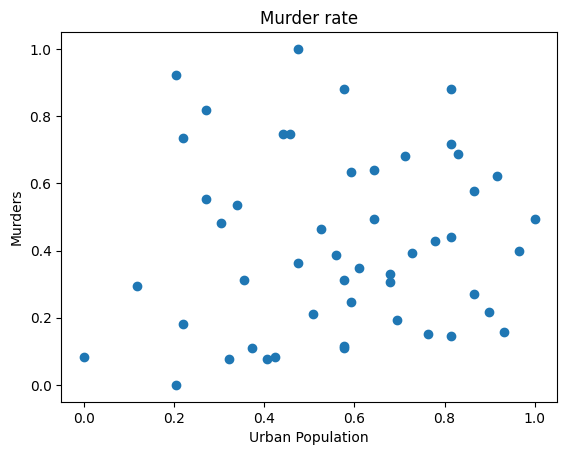

In [19]:
plt.scatter(df['UrbanPop'], df['Murder'])
plt.xlabel('Urban Population')
plt.ylabel('Murders')
plt.title('Murder rate')

In [20]:
model = KMeans(n_clusters=2)

In [21]:
m = model.fit(df)

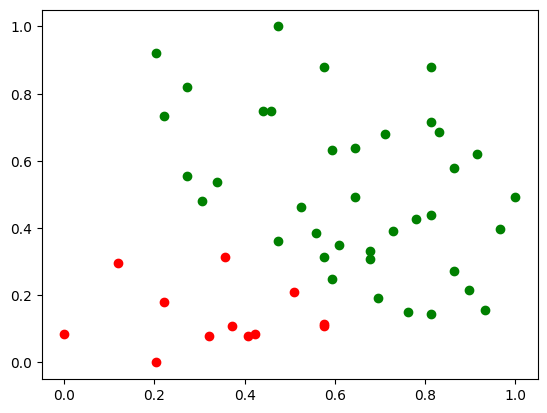

In [22]:
plt.scatter(df['UrbanPop'][model.labels_ == 0],
            df['Murder'][model.labels_ == 0],
            color='r')
plt.scatter(df['UrbanPop'][model.labels_ == 1],
            df['Murder'][model.labels_ == 1],
            color='g')

In [23]:
df1 = pd.read_csv('./crime_data.csv')
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
df1.drop(['Unnamed: 0','Murder','Assault'], axis=1, inplace=True)
df1

,UrbanPop,Rape
0,58,21.2
1,48,44.5
2,80,31.0
3,50,19.5
4,91,40.6
5,78,38.7
6,77,11.1
7,72,15.8
8,80,31.9
9,60,25.8


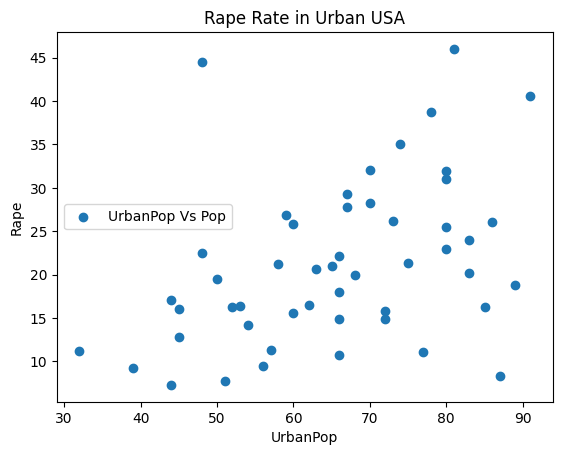

In [27]:
plt.scatter(df1['UrbanPop'], df1['Rape'], label='UrbanPop Vs Pop')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('Rape Rate in Urban USA')
plt.legend()

In [31]:
no_of_clusters = np.arange(1, 11)
wss = []

for k in no_of_clusters:
    # create the model for k number of clusters
    model = KMeans(n_clusters=k, random_state=12345)

    # fit the data
    model.fit(df1)

    # collect the wss for elbow method
    wss.append(model.inertia_)

[14565.148799999999, 6730.9946215781, 4710.82432330827, 3706.4844589160834, 3116.0287420634922, 2737.8144444444447, 1971.0904155844155, 1533.0415000000003, 1394.1058928571429, 1143.8561904761905]


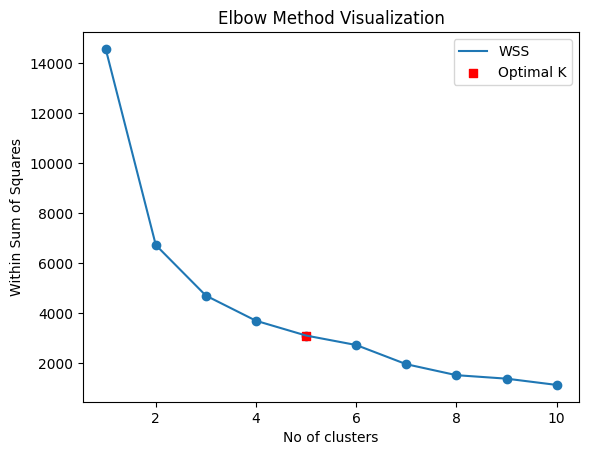

In [33]:
plt.plot(no_of_clusters, wss, label="WSS")
plt.scatter(no_of_clusters, wss)
plt.scatter(no_of_clusters[4], wss[4],
            color="red", label="Optimal K", marker="s")
plt.xlabel("No of clusters")
plt.ylabel("Within Sum of Squares")
plt.title("Elbow Method Visualization")
plt.legend()

print(wss)

Text(0.5, 1.0, 'Rape Rate in Urban pop')

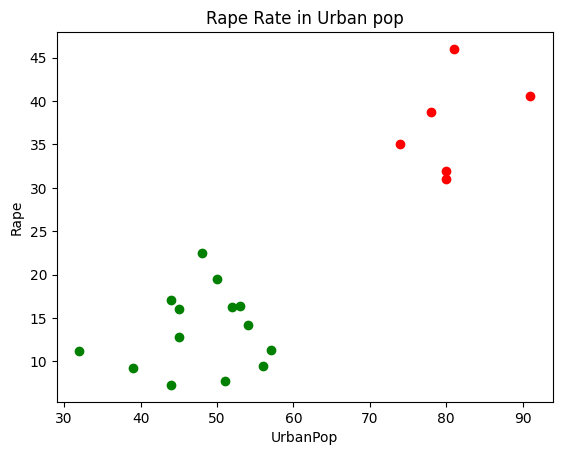

In [35]:
model = KMeans(n_clusters=5, random_state=12354)
model.fit(df1)

plt.scatter(df1['UrbanPop'][model.labels_ == 0],
            df1['Rape'][model.labels_ == 0],
            color='r')
plt.scatter(df1['UrbanPop'][model.labels_ == 1],
            df1['Rape'][model.labels_ == 1],
            color='g')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('Rape Rate in Urban pop')